### Imports & installation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
pip uninstall holidays -y

In [ ]:
pip install holidays==0.23

In [ ]:
pip install prophet

In [2]:
from prophet import Prophet

### Loading & transforming the data

In [44]:
train_data = pd.read_csv('burglary_train.csv')
test_data = pd.read_csv('burglary_test.csv')

In [ ]:
# can use this to add ward info to dataframe. Like a natural join
withwardinfo = merge(train_data, ward_dataframe, on=’ward’, how=’inner’)

In [41]:
# creating mini-dataframes based on column value. Now it is based on LSOA codes but 
# because there are so many LSOAs the dataframes are rather small

LSOA_codes = test_data['LSOA code'].unique()
LSOA_codes

first_LSOA = test_data.groupby(['LSOA code'])
little_dataframe = first_LSOA.get_group(LSOA_codes[0])

little_dataframe

,Unnamed: 0,Crime ID,Month,Reported by,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,14528,d472a031977f0820d307b9b3b006917dc10dce0e4fa53f...,2019-11,Metropolitan Police Service,-0.248715,51.605323,On or near Linklea Close,E01000153,Barnet 026D,Burglary,Status update unavailable
1,14527,c79749350980cf1d194a965ecdb568e2d7e79fbcb48231...,2019-11,Metropolitan Police Service,-0.248744,51.603462,On or near Parklea Close,E01000153,Barnet 026D,Burglary,Status update unavailable
380,15183,e3d48a3bf3cec3303b488b3a2df88d5194fd39c6887809...,2019-12,Metropolitan Police Service,-0.248724,51.604712,On or near Highlea Close,E01000153,Barnet 026D,Burglary,Under investigation
666,12592,ad7c8a32fd45c996a394c871ac2dee5c6a326a1c5f961b...,2020-01,Metropolitan Police Service,-0.247180,51.603565,On or near Great Field,E01000153,Barnet 026D,Burglary,Under investigation
667,12591,15403f3de7fe7b4f6fe54b015568c762cfc5765e68e5a8...,2020-01,Metropolitan Police Service,-0.248219,51.606583,On or near Wardell Close,E01000153,Barnet 026D,Burglary,Under investigation
668,12590,2d08ddcea82b30e90f14ce5f11fc5dca066647f91cd2de...,2020-01,Metropolitan Police Service,-0.247180,51.603565,On or near Great Field,E01000153,Barnet 026D,Burglary,Under investigation
895,9985,f7b4839273061f93f7de37a0be96c1f31c672b9e455881...,2020-02,Metropolitan Police Service,-0.248715,51.605323,On or near Linklea Close,E01000153,Barnet 026D,Burglary,Under investigation
896,9986,f67e826e57aa04b718cf8fda78847d060559003e7ad3a1...,2020-02,Metropolitan Police Service,-0.248715,51.605323,On or near Linklea Close,E01000153,Barnet 026D,Burglary,Investigation complete; no suspect identified
897,9987,80194d6a15776d2932764f3c0d800052cddfc655487634...,2020-02,Metropolitan Police Service,-0.248763,51.604083,On or near Brooklea Close,E01000153,Barnet 026D,Burglary,Under investigation
898,9988,c89f685fb8967da6781850d817c87d873c9bad04df2220...,2020-02,Metropolitan Police Service,-0.245891,51.601783,On or near Quakers Course,E01000153,Barnet 026D,Burglary,Investigation complete; no suspect identified


In [ ]:
def to_datetime(df):
    # Changes date to datetime 
    for index, value in enumerate(df['Month']):
        df.at[index, 'Month'] = datetime.strptime(value, '%Y-%m')
    return df

def get_most_frequent_locations(df):
    # Returns a list of most frequent location per month 
    df_grouped = df.groupby([pd.Grouper(key='Month', freq='M'), 'LSOA code']).size()
    most_frequent_location = df_grouped.groupby(level=0).idxmax()
    locs = []
    for loc in range(len(most_frequent_location)):
        locs.append(most_frequent_location[loc][1])
    return locs

def count_per_month(df):
    # Return a dataframe with crimes count per month
    df_per_month = df.groupby(pd.Grouper(key='Month', freq='M')).size()
    df_per_month = pd.DataFrame(df_per_month)
    df_per_month['ds'] = df_per_month.index
    df_per_month = df_per_month.rename(columns={0: 'y'})
    return df_per_month 

def add_locs(df, locs):
    # Adds most frequent location column to the dataframe
    df['loc'] = locs
    return df

In [19]:
def loc_encoding(df):
    # Returns a dataframe with encoded locations
    one_hot_encoded = pd.get_dummies(df['loc'])
    df_encoded = pd.concat([df, one_hot_encoded], axis=1)
    df_encoded = df_encoded.drop('loc', axis=1)
    return df_encoded

def get_cols_for_pred(df):
    # Returns a list of additional columns for regression 
    columns = df.iloc[:, 2:]
    return columns

In [42]:
train_data = to_datetime(train_data)
locs = get_most_frequent_locations(train_data)
train_data = count_per_month(train_data)
train_data = add_locs(train_data, locs)
train_data = loc_encoding(train_data)
pred_cols = get_cols_for_pred(train_data)

In [ ]:
test_data = to_datetime(test_data)
locs = get_most_frequent_locations(test_data)
test_data = count_per_month(test_data)
test_data = add_locs(test_data, locs)
test_data = loc_encoding(test_data)

## Prophet

In [8]:
prophet_model = Prophet(yearly_seasonality=True)

prophet_model.fit(train_data)

future = prophet_model.make_future_dataframe(periods=12, freq='M')
predictions = prophet_model.predict(future)

22:35:12 - cmdstanpy - INFO - Chain [1] start processing
22:35:12 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
train_data

,y,ds,E01000116,E01000118,E01000122,E01000123,E01000128,E01000129,E01000130,E01000131,...,E01000296,E01000299,E01000305,E01000307,E01000310,E01000314,E01000315,E01000316,E01000322,E01033572
Month,,,,,,,,,,,,,,,,,,,,,
2010-12-31,372,2010-12-31,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-31,486,2011-01-31,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-02-28,403,2011-02-28,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-03-31,408,2011-03-31,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-04-30,414,2011-04-30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-31,281,2019-07-31,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-08-31,227,2019-08-31,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-09-30,270,2019-09-30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\nurvo\AppData\Local\Temp\ipykernel_9600\738522883.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


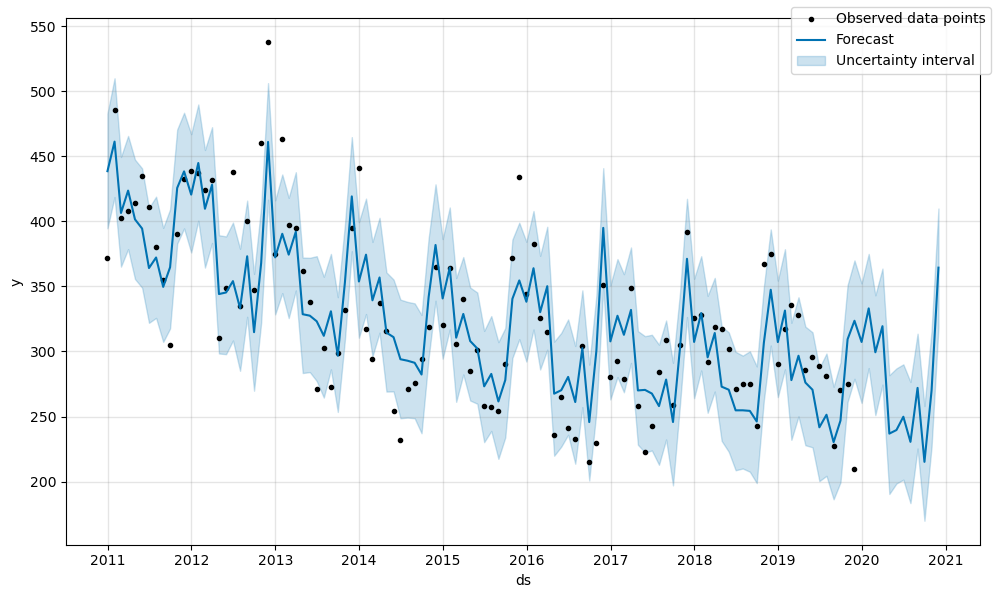

In [43]:
plt = prophet_model.plot(predictions)
plt.legend()
plt.show()

In [ ]:
test_predictions = predictions[-12:]
test_predictions_reset = test_predictions.reset_index(drop=True)
test_data_reset = test_data[-12:].reset_index(drop=True)

In [ ]:
mse = ((test_predictions_reset['yhat'] - test_data_reset['y']) ** 2).mean()
rmse = mse ** 0.5
print('RMSE: {:.2f}'.format(rmse))

In [ ]:
components = prophet_model.plot_components(predictions)

In [ ]:
# def get_encoded():
#     # Retrieve the encoded values for 'encoded_cat_var1' based on the future data points
#     # For example, assuming 'ds' is the timestamp in the future timeline
#     return train_data.loc[train_data['ds'].isin(future['ds']), str(col)]

In [ ]:
# prophet_model = Prophet()

# for col in pred_cols:
#     prophet_model.add_regressor(col)
# # prophet_model.fit(train_data)

# # future = prophet_model.make_future_dataframe(periods=12, freq='M')
# # regressor_data_future = get_encoded()  # Retrieve encoded regressor values for the future timeline

# # for col in pred_cols:
# #     future[col] = regressor_data_future[col]  # Assign the encoded regressor values to the future DataFrame

# # forecast = prophet_model.predict(future)  # Generate forecasts using the prepared future DataFrame

In [ ]:
# new model with location as additional regressor (in dummy variables)
prophet_model_extra = Prophet(yearly_seasonality=True)

# adds all location dummies to the model and fits the training data
for col in pred_cols:
    prophet_model_extra.add_regressor(col)

prophet_model_extra.fit(train_data)

In [ ]:
# extract column names. This is needed to create the future dataset
colnames = pred_cols.columns.values.tolist()

In [ ]:
# create future dataframe, merge it with the columns where the date matches
future_extra = prophet_model_extra.make_future_dataframe(periods=12, freq='M')
future_extra = train_data[['ds']+colnames].merge(future_extra, how='outer', on='ds')
future_extra

In [ ]:
forecast = prophet_model.predict(future_extra) 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=986fb8fd-fd48-481b-91de-f6577d6c21b9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>